<a href="https://colab.research.google.com/github/saad3223/ML-Projects/blob/main/HW_Week9_Saad_Bousbait_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.) Import and Clean data

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [4]:
df = pd.read_csv("/content/gdrive/MyDrive/Econ441B/Country-data.csv", sep = ",")

In [5]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [7]:
names = df[["country"]]
X = df.drop(["country"], axis = 1)



In [8]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 1.) Fit a kmeans Model with any Number of Clusters

In [9]:
kmeans = KMeans(n_clusters= 3
                , random_state=42).fit(X_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# 2.) Pick two features to visualize across

In [ ]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

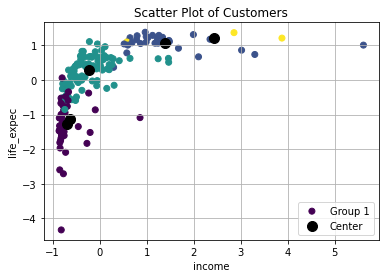

In [43]:
# CHANGE THESE BASED ON WHICH IS INTERESTING TO YOU
x1_index = 4
x2_index = 6


plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='black', s=100)

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')
plt.legend(["Group 1", "Center", "Group 2"])
plt.grid()
plt.show()

# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means
 

In [125]:
WCSSs = []
ks = range(1, 15)
for k in ks:
    kmeans = KMeans(n_clusters=k, n_init=30, init='random', random_state=42)
    kmeans.fit(X_scaled)
    WCSSs.append(kmeans.inertia_)

# 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

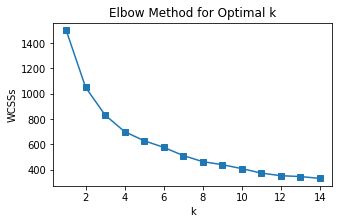

In [126]:
plt.figure(figsize=(5,3))
plt.plot(range(1,15), WCSSs, marker = 's')
plt.xlabel('k')
plt.ylabel('WCSSs')
plt.title('Elbow Method for Optimal k')
plt.show()

From the above plot, it appears that the optimal number of clusters for the dataset is around 5. This is where the inertia starts to level off, suggesting that adding more clusters may not provide much additional benefit in terms of clustering accuracy.

In [114]:
kmeans = KMeans(n_clusters=5, random_state=42).fit(X_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# 5.) Create a list of the countries that are in each cluster. Write interesting things you notice. Hint : Use .predict(method)

In [115]:
countries = kmeans.predict(X_scaled)
countries

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 1,
       1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 1, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 2, 0, 1, 1, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 4, 2, 0, 0, 2, 2, 0, 4, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       1, 1, 0, 3, 1, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 4, 2, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0], dtype=int32)

In [116]:
df['cluster'] = countries
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


In [119]:
df1=df.loc[df['cluster'] == 0, ['country', 'cluster']]
df2=df.loc[df['cluster'] == 1, ['country', 'cluster']]
df3=df.loc[df['cluster'] == 2, ['country', 'cluster']]
df4=df.loc[df['cluster'] == 3, ['country', 'cluster']]
df5=df.loc[df['cluster'] == 4, ['country', 'cluster']]
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', None)

In [120]:
print(df1['country'])

0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106     

In [121]:
print(df2['country'])

7                 Australia
8                   Austria
10                  Bahamas
15                  Belgium
23                   Brunei
29                   Canada
42                   Cyprus
43           Czech Republic
44                  Denmark
53                  Finland
54                   France
58                  Germany
60                   Greece
68                  Iceland
73                  Ireland
74                   Israel
75                    Italy
77                    Japan
82                   Kuwait
110             Netherlands
111             New Zealand
114                  Norway
122                Portugal
123                   Qatar
135                Slovenia
138             South Korea
139                   Spain
144                  Sweden
145             Switzerland
157    United Arab Emirates
158          United Kingdom
159           United States
Name: country, dtype: object


In [122]:
print(df3['country'])

1                             Albania
2                             Algeria
4                 Antigua and Barbuda
5                           Argentina
6                             Armenia
9                          Azerbaijan
11                            Bahrain
12                         Bangladesh
13                           Barbados
14                            Belarus
16                             Belize
18                             Bhutan
19                            Bolivia
20             Bosnia and Herzegovina
22                             Brazil
24                           Bulgaria
27                           Cambodia
30                         Cape Verde
33                              Chile
34                              China
35                           Colombia
39                         Costa Rica
41                            Croatia
45                 Dominican Republic
46                            Ecuador
47                              Egypt
48          

In [123]:
print(df4['country'])

113    Nigeria
Name: country, dtype: object


In [124]:
print(df5['country'])

91     Luxembourg
98          Malta
133     Singapore
Name: country, dtype: object


Most of the countries are clustered in the first , second and third groups, i dont see real connection between these counrtries. Forth and fifth groups are showing very few countries.

#6.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [118]:
df.groupby('cluster').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster,,,,,,,,,
0,90.793617,29.661915,6.462553,43.680851,3870.702128,9.951809,59.212766,4.974043,1900.255319
1,5.181250,46.118750,9.088437,40.584375,44021.875000,2.513844,80.081250,1.788437,42118.750000
2,21.614286,40.976060,6.169048,47.518642,12801.071429,7.618857,73.004762,2.277619,6581.809524
3,130.000000,25.300000,5.070000,17.400000,5150.000000,104.000000,60.500000,5.840000,2330.000000
4,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667


# Q7.) Write an observation about the descriptive statistics.

I can see variation of clusters means withen the same feature for almost all of the features. This is an indication of successful groupings. 